C:\Users\hjl161\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)
C:\Users\hjl161\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)


Model 1 Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:             choice_bin   No. Observations:                 7432
Model:                            GLM   Df Residuals:                     7426
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3325.5
Date:                Fri, 29 Nov 2024   Deviance:                       6651.0
Time:                        11:40:08   Pearson chi2:                 7.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2732
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.233

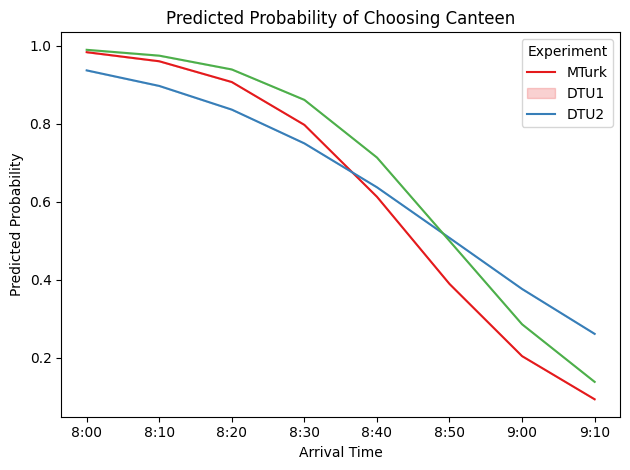

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data
cd = pd.read_csv("../Data/data.csv")

# Create a unique pair ID for each session and group
cd['pair_id'] = cd['session'].astype(str) + "_" + cd['group'].astype(str)

# Change arrival times to consecutive integers
cd['arr'] = pd.factorize(cd['arrival'])[0] + 1

# Select the required columns
columns_to_keep = ["exp", "pair_id", "code", "round", "arr", "choice", "certainty"]
Data = cd[columns_to_keep].copy()

# Convert categorical variables to factors
Data['choice_bin'] = (Data['choice'] == 1).astype(int)  # Convert choice to binary for logistic regression
Data['exp'] = pd.Categorical(Data['exp'], categories=["AMT", "DTU1", "DTU2"], ordered=False)

# Fit the initial logistic regression model using GLM with a binomial distribution
model1 = smf.glm(
    formula="choice_bin ~ arr * exp", 
    data=Data, 
    family=sm.families.Binomial(),
    link=sm.families.links.logit
).fit()

print("Model 1 Summary:")
print(model1.summary())

# Get confidence intervals for Model 1
conf_int1 = model1.conf_int()
print("\nConfidence Intervals for Model 1:")
print(conf_int1)

# Relevel `exp` to compare DTU1 against others
Data['exp'] = Data['exp'].cat.reorder_categories(["DTU1", "AMT", "DTU2"], ordered=False)

# Fit the second model to test DTU1 against others
model2 = smf.glm(
    formula="choice_bin ~ arr * exp", 
    data=Data, 
    family=sm.families.Binomial(),
    link=sm.families.links.logit
).fit()

print("\nModel 2 Summary:")
print(model2.summary())

# Get confidence intervals for Model 2
conf_int2 = model2.conf_int()
print("\nConfidence Intervals for Model 2:")
print(conf_int2)

# Predicted probabilities from Model 2
Data['pred'] = model2.predict()

# Plot predicted probabilities
sns.lineplot(data=Data, x="arr", y="pred", hue="exp", palette="Set1")
plt.title("Predicted Probability of Choosing Canteen")
plt.xlabel("Arrival Time")
plt.ylabel("Predicted Probability")
plt.xticks(ticks=range(1, 9), labels=["8:00", "8:10", "8:20", "8:30", "8:40", "8:50", "9:00", "9:10"])
plt.legend(title="Experiment", labels=["MTurk", "DTU1", "DTU2"])
plt.grid(visible=False)
plt.tight_layout()
plt.show()

# Adjusting plot aesthetics to match R's ggplot2 style

